## **car_evaluation.csv DL Classification**

In [93]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary

In [94]:
import pandas as pd
import os

# 데이터 불러오기
file_name = 'car_evaluation.csv'
full_file_path = os.path.join(os.getcwd() + "\\" + file_name)

# 데이터의 컬럼이 따로 없기 때문에 header = None을 이용해 임의의 컬럼명 생성
df = pd.read_csv(full_file_path, header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [95]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [96]:
# 컬럼 명 변경
df.columns = ['price', 'maint', 'doors', 'person', 'lug_capacity', 'safaty', 'output']
df.head()

,price,maint,doors,person,lug_capacity,safaty,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [97]:
# 결측치 확인
df.isna().sum()

price           0
maint           0
doors           0
person          0
lug_capacity    0
safaty          0
output          0
dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

# 인코딩 작업
def encode_features(dataDF) :
    features = ['price', 'maint', 'doors', 'person', 'lug_capacity', 'safaty', 'output']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

df = encode_features(df)
df.head()

,price,maint,doors,person,lug_capacity,safaty,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [99]:
from sklearn.preprocessing import StandardScaler

# 피처, 레이블 데이터 나누기
X = df.drop('output', axis = 1).values
y = df['output'].values

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [100]:
X

array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         0.        ],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         1.22474487],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
        -1.22474487]])

In [101]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [103]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [104]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1382, 6]),
 torch.Size([346, 6]),
 torch.Size([1382]),
 torch.Size([346]))

In [106]:
# 모델 정의
class CarEvaluationDense(nn.Module):
    def __init__(self):
        super(CarEvaluationDense, self).__init__()
        self.fc1 = nn.Linear(6, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 4)  # 4 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = CarEvaluationDense()

In [ ]:
# 손실 함수 및 최적화 기법 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [111]:
# 모델 학습
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 1.0554, Accuracy: 69.36%
Epoch 2/20, Loss: 0.7149, Accuracy: 69.08%
Epoch 3/20, Loss: 0.6685, Accuracy: 68.21%
Epoch 4/20, Loss: 0.6345, Accuracy: 67.92%
Epoch 5/20, Loss: 0.5962, Accuracy: 68.21%
Epoch 6/20, Loss: 0.5832, Accuracy: 68.50%
Epoch 7/20, Loss: 0.5315, Accuracy: 70.81%
Epoch 8/20, Loss: 0.4843, Accuracy: 72.83%
Epoch 9/20, Loss: 0.4451, Accuracy: 75.14%
Epoch 10/20, Loss: 0.3890, Accuracy: 84.97%
Epoch 11/20, Loss: 0.3543, Accuracy: 84.97%
Epoch 12/20, Loss: 0.3250, Accuracy: 86.71%
Epoch 13/20, Loss: 0.2897, Accuracy: 86.99%
Epoch 14/20, Loss: 0.2667, Accuracy: 86.42%
Epoch 15/20, Loss: 0.2493, Accuracy: 89.02%
Epoch 16/20, Loss: 0.2285, Accuracy: 89.02%
Epoch 17/20, Loss: 0.2163, Accuracy: 86.99%
Epoch 18/20, Loss: 0.1932, Accuracy: 89.60%
Epoch 19/20, Loss: 0.1785, Accuracy: 90.17%
Epoch 20/20, Loss: 0.1644, Accuracy: 91.91%
Training complete.


In [112]:
# 모델 평가
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average = 'weighted')
precision = precision_score(all_labels, all_predictions, average = 'weighted')
recall = recall_score(all_labels, all_predictions, average = 'weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[ 69   0   9   1]
 [ 10   5   0   2]
 [  4   0 236   0]
 [  2   0   0   8]]
F1 Score: 0.91
Precision: 0.92
Recall: 0.92
Specificity: 0.96


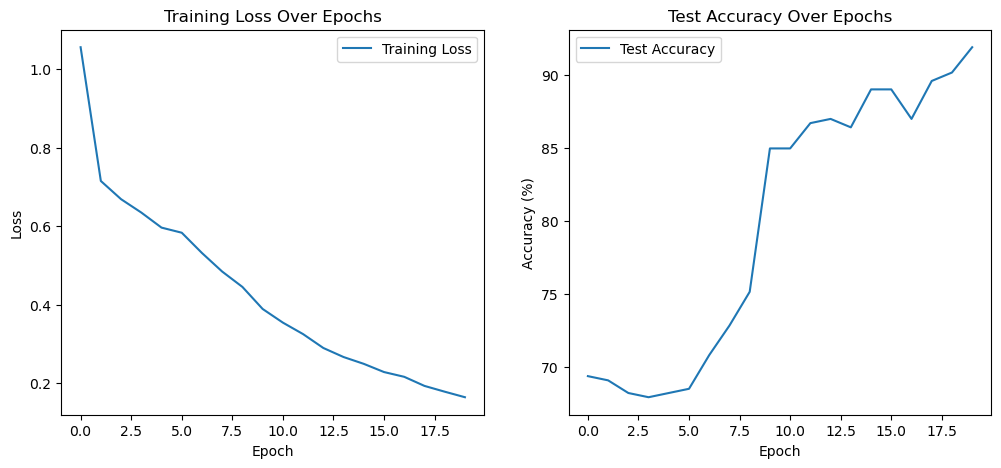

In [113]:
# Plot the loss and accuracy
plt.figure(figsize = (12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label = 'Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()